# Implementation: Parallel Tempering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib
from IPython.display import HTML, Image
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from parallel_tempering import energy, f

#### Running the code for a given number of chains and epochs

In [4]:
num_chains = 4
num_epochs = 10000

In [5]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

acceptance for temp=3: 89.70%, exchange: 80.00%
acceptance for temp=1: 80.52%, exchange: 70.00%
Total time: 99.55645394325256
acceptance for temp=2: 87.99%, exchange: 90.00%
acceptance for temp=4: 90.30%, exchange: 0.00%


#### Loading in the results

In [6]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(4, 10000, 2)


#### Plotting the results

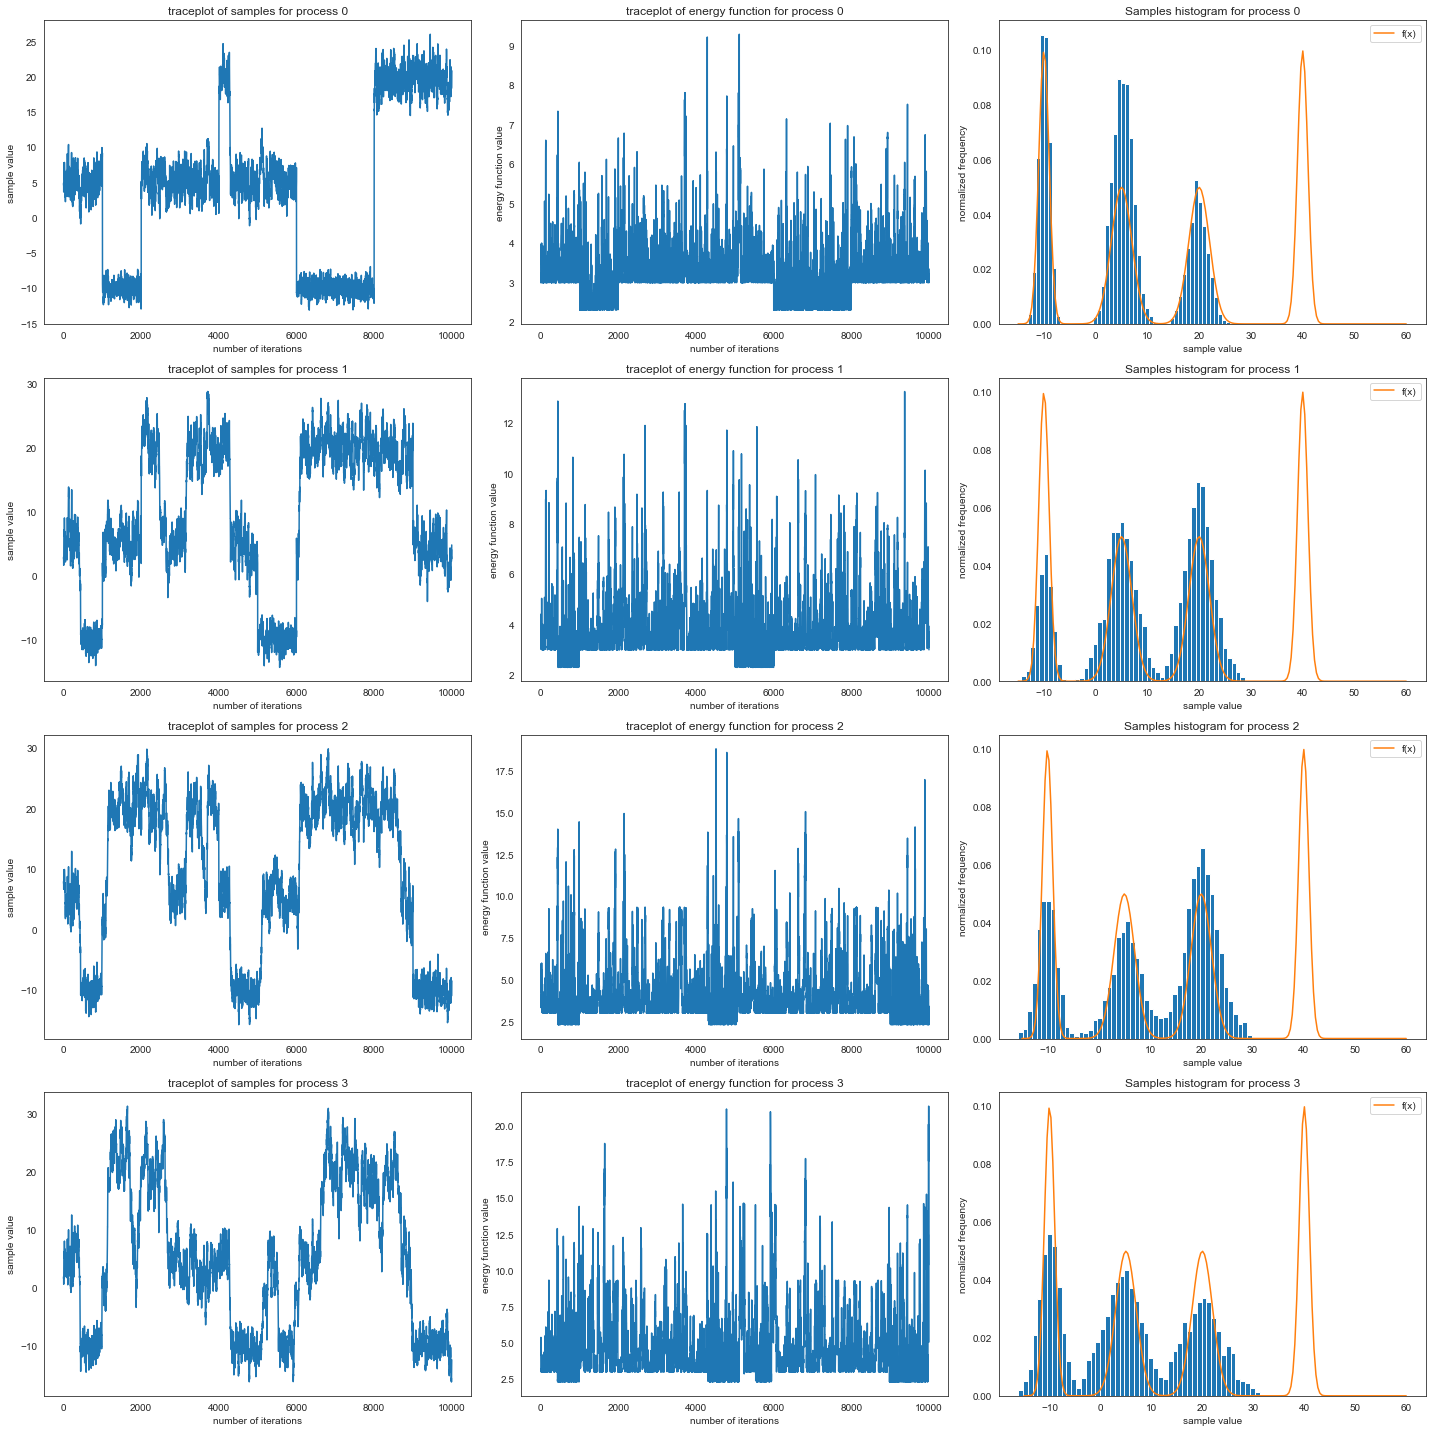

In [7]:
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=50, density=True)
    xgrid = np.linspace(-15,60,200)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
    
fig.tight_layout()

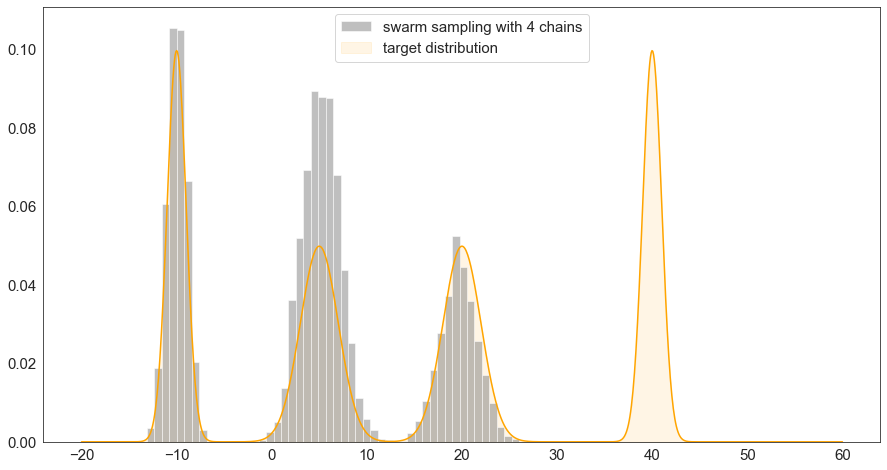

In [8]:
best = all_results[0][:,0]
fig, ax = plt.subplots(figsize=(15,8))
xgrid = np.linspace(-20,60,1000)
ax.plot(xgrid, f(xgrid), color='orange', alpha=1)
ax.fill_between(xgrid, np.zeros(len(xgrid)) , f(xgrid), label='target distribution', alpha=0.1, color='orange')
ax.hist(best, bins=50, density=True, alpha=0.5, color='grey', label='swarm sampling with 4 chains')
ax.legend(fontsize=15)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

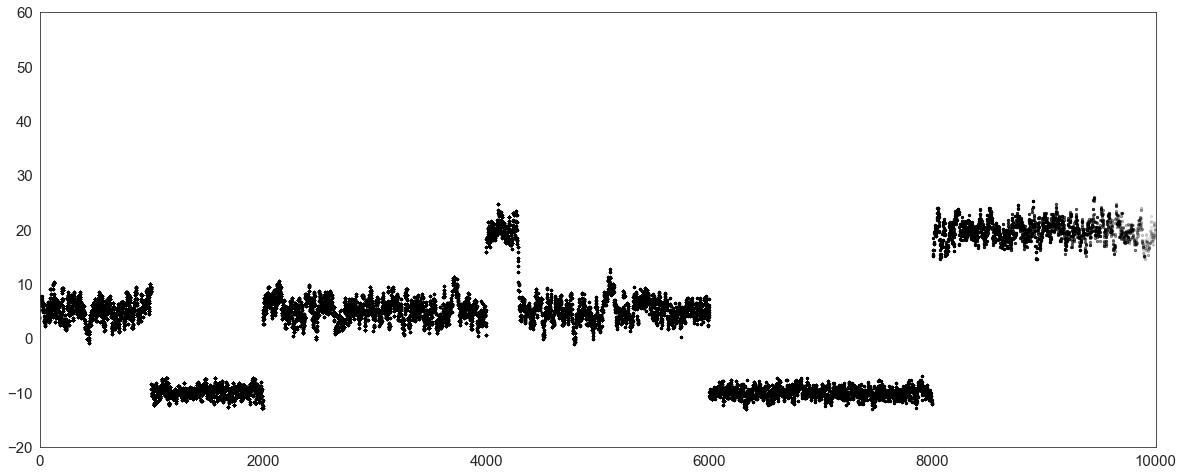

In [9]:
best = all_results[0][:,0]
rc('animation', html='html5')

n = 100
interval = int(10000/(n))+1

fps = int(n/10)
def update_plot(frame, fig, ax):
    ax.scatter(range(frame,frame*interval),best[frame:frame*interval], alpha=0.1, color='black', s=5)

fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlim(0,10000)
ax.set_ylim(-20,60)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
    
anim = animation.FuncAnimation(fig, update_plot, fargs=(fig, ax), frames=n, interval=interval)
anim.save('multimodal_points.gif', writer='imagemagick', fps=fps)

/Users/abhimanyu/anaconda2/envs/am207/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


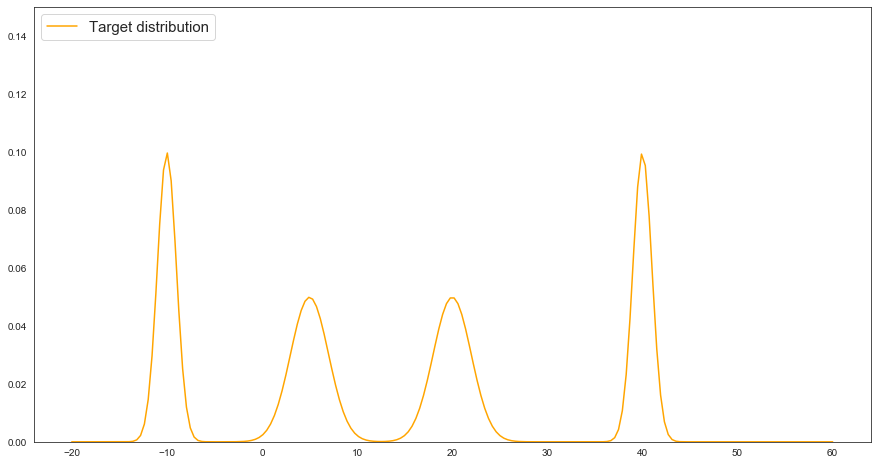

In [13]:
best = all_results[0][:,0]
rc('animation', html='html5')

n = 11
interval = int(10000/n)
fps = 1

def update_hist(frame, fig, ax):
    plt.cla()
    ax.collections.clear()
    ax.plot(xgrid, f(xgrid), color='orange', alpha=1, label='Target distribution')
#     ax.fill_between(xgrid, np.zeros(len(xgrid)), f(xgrid), alpha=0.1, color='orange')
    ax.hist(best[:frame*interval], bins=50, density=True, alpha=0.5, color='grey')
    ax.legend(loc='upper left', fontsize=15)
    ax.set_ylim(0,0.15)

fig, ax = plt.subplots(figsize=(15,8))
xgrid = np.linspace(-20,60,200)
ax.plot(xgrid, f(xgrid), color='orange', alpha=1)
ax.fill_between(xgrid, np.zeros(len(xgrid)), f(xgrid), alpha=0.1, color='orange')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
    
anim = animation.FuncAnimation(fig, update_hist, fargs=(fig, ax), frames=n, interval=interval)
anim.save('multimodal_hist.gif', writer='imagemagick', fps=fps)

---